## Normalizing the orientation of a batch of 3D images with the pytorch version

In [1]:
import torch
import numpy as np
from inertia import normalize_orientation_torch
from plot_field import plot_inertia_torch
%matplotlib widget

Loading the 3D image

In [2]:
image_3D_1 = np.load("./npy/example1.npy")
image_3D_2 = np.load("./npy/example2.npy")
torch_image_1 = torch.from_numpy(image_3D_1).to("cuda:0")
torch_image_2 = torch.from_numpy(image_3D_2).to("cuda:0")
batch_tensors = torch.zeros((2,1,50,50,50))
batch_tensors[0][0] = torch_image_1
batch_tensors[1][0] = torch_image_2

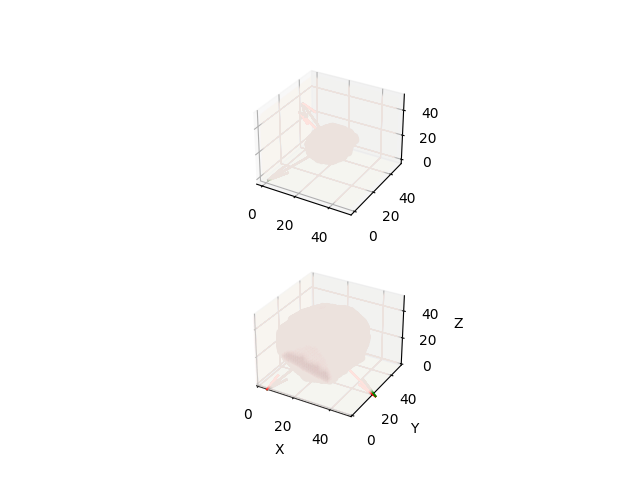

In [3]:
plot_inertia_torch(batch_tensors)

Normalizing orientations <br>

/home/vludvig/Documents/GitHub/normalize3D/inertia.py:127: UserWarning: torch.eig is deprecated in favor of torch.linalg.eig and will be removed in a future PyTorch release.
torch.linalg.eig returns complex tensors of dtype cfloat or cdouble rather than real tensors mimicking complex tensors.
L, _ = torch.eig(A)
should be replaced with
L_complex = torch.linalg.eigvals(A)
and
L, V = torch.eig(A, eigenvectors=True)
should be replaced with
L_complex, V_complex = torch.linalg.eig(A) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2910.)
  eigen_values1, Eigen_Vectors1 = torch.eig(mi1, eigenvectors=True)
/home/vludvig/Documents/GitHub/normalize3D/rotation.py:168: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rotated_field[i][0] = torch.tensor(bounding_tensor_field[i][0][matrix_x.long(), matrix_y.long(), matrix_z.long

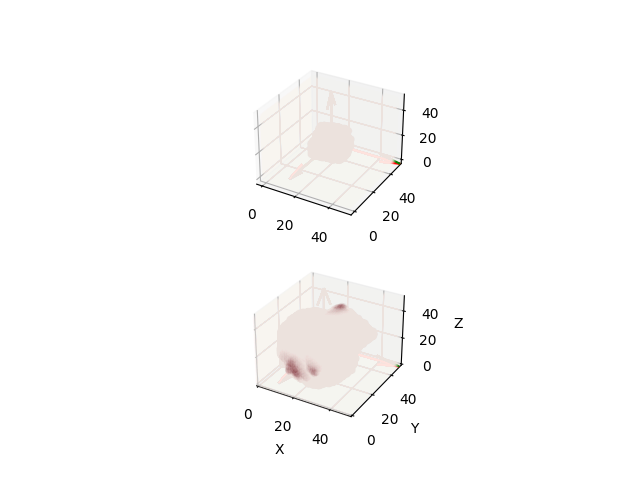

In [4]:
batch_normalized = normalize_orientation_torch(batch_tensors.to("cuda:0"))
plot_inertia_torch(batch_normalized)